In [1]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

In [2]:
seaborn.set(rc={'figure.figsize':(10,10),})
seaborn.set_context('talk') # or paper

In [3]:
# Load the data file
#df = pd.read_csv('true_pi0s_small.csv')
#df = pd.read_csv('true_pi0s_10000.csv')
#df = pd.read_csv('true_pi0s.csv')

# Define data file name
data_file_name = 'true_pi0s_all.csv'

# Define constants
true_pi0_mass = 134.9766

# Number of showers in the event

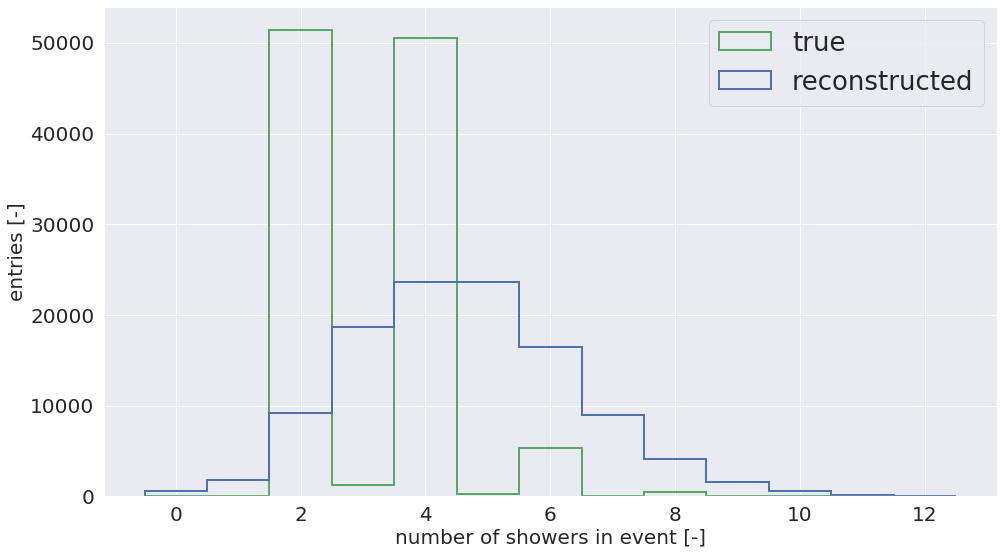

In [28]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(16,9),})

# Binning
x_min  = -0.5
x_max  = 12.5
n_bins = 13

# Data
plt.hist(df.n_true_gammas_in_event, bins=n_bins, range=[x_min,x_max], histtype='step', color='g', linewidth=2)
plt.hist(df.n_reco_gammas_in_event, bins=n_bins, range=[x_min,x_max], histtype='step', color='b', linewidth=2)
#step or stepfilled, alpha=0.75, density=False alpha=0.75

# Legend
plt.legend(['true', 'reconstructed'], loc='best', prop={'size': 26})

# Axes
plt.xlabel('number of showers in event [-]', fontsize=20)
plt.ylabel('entries [-]', fontsize=20)
plt.tick_params(labelsize=20)

# Plot
#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

### -> odd number of true photons (originated from pi0 decays) ?
probably just those produced at the edge of the argon volume -> escaping the "world".
Need to check that.

13
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


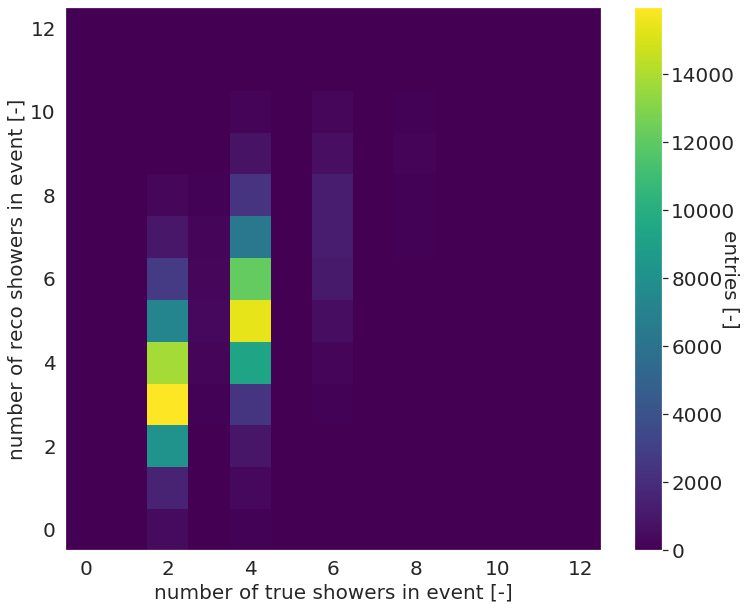

In [5]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

fig, ax = plt.subplots()

# Binning
#x_min  = -0.5
#x_max  = 12.5
#y_min  = -0.5
#y_max  = 12.5
#x_bins = np.arange(x_min,x_max+1,step=1.)
#y_bins = np.arange(y_min,y_max+1,step=1.)
x_min    = -0.5
x_max    = 12.5
y_min    = -0.5
y_max    = 12.5
n_bins_x = int(abs(x_max)-abs(x_min)+1)
n_bins_y = int(abs(y_max)-abs(y_min)+1)
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)
print(n_bins_x)
print(x_bins)

#plt.hist2d(x,y,bins=[x_bins,y_bins])

# Data
plt.hist2d(df.n_true_gammas_in_event, df.n_reco_gammas_in_event, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('number of true showers in event [-]', fontsize=20)
plt.ylabel('number of reco showers in event [-]', fontsize=20)
plt.tick_params(labelsize=20)

#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

# Distances between shower's first_step true and reco

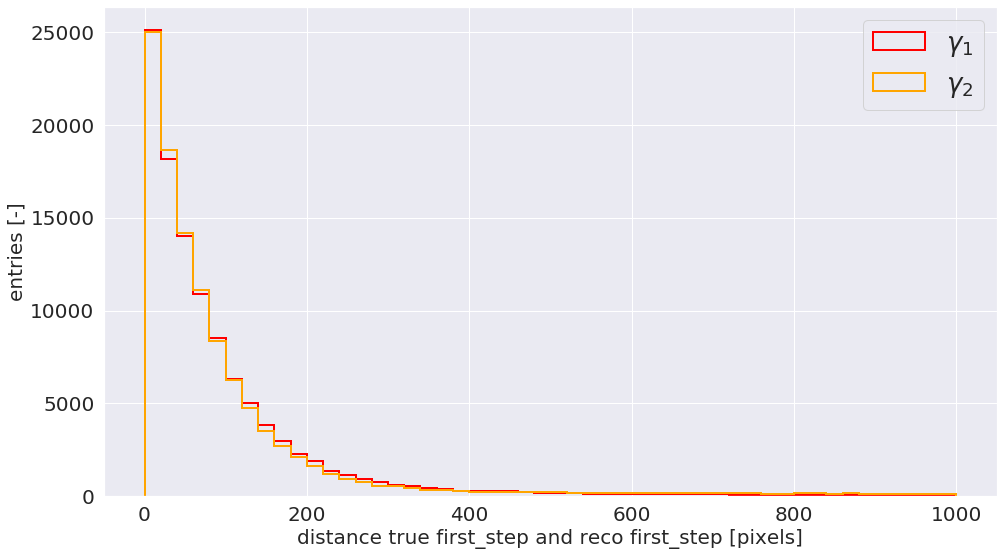

In [6]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(16,9),})

# Binning
x_min  = 0
x_max  = 1000
n_bins = 50

# Data
difference_gamma1 = np.sqrt( (df.true_gamma_1_pos_x-df.reco_gamma_1_first_step_x)**2 +
                             (df.true_gamma_1_pos_y-df.reco_gamma_1_first_step_y)**2 +
                             (df.true_gamma_1_pos_z-df.reco_gamma_1_first_step_z)**2
                           )
difference_gamma2 = np.sqrt( (df.true_gamma_2_pos_x-df.reco_gamma_2_first_step_x)**2 +
                             (df.true_gamma_2_pos_y-df.reco_gamma_2_first_step_y)**2 +
                             (df.true_gamma_2_pos_z-df.reco_gamma_2_first_step_z)**2
                           )
plt.hist(difference_gamma1, bins=n_bins, range=[x_min,x_max], histtype='step', color='red', linewidth=2)
plt.hist(difference_gamma2, bins=n_bins, range=[x_min,x_max], histtype='step', color='orange', linewidth=2)
#step or stepfilled, alpha=0.75, density=False alpha=0.75

# Legend
plt.legend(['$\gamma_1$','$\gamma_2$'], loc='best', prop={'size': 26})

# Axes
plt.xlabel('distance true first_step and reco first_step [pixels]', fontsize=20)
plt.ylabel('entries [-]', fontsize=20)
plt.tick_params(labelsize=20)

# Plot
#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

# Momentum

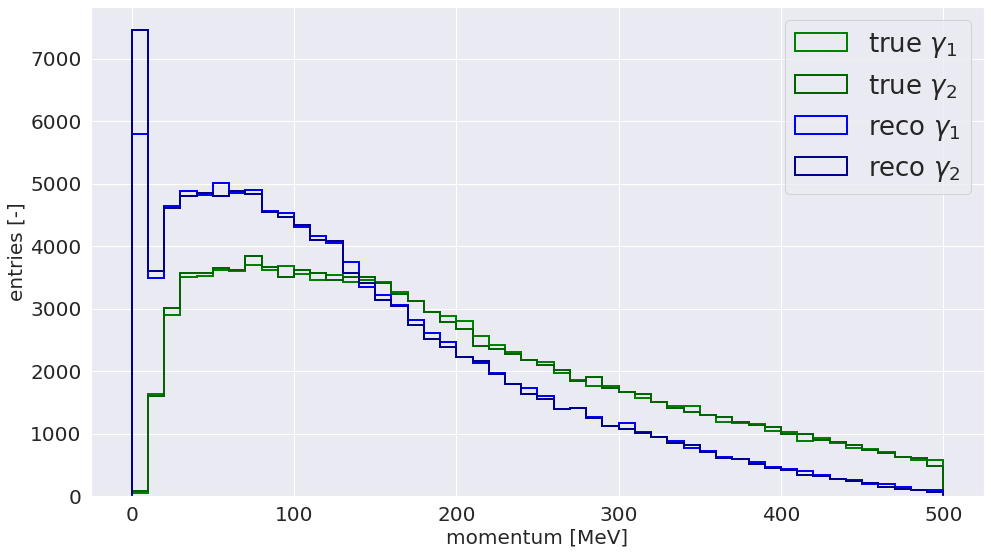

In [7]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(16,9),})

# Binning
x_min  = 0
x_max  = 500
n_bins = 50

# Data
true_gamma_1_mom = df.true_gamma_1_ekin
true_gamma_2_mom = df.true_gamma_2_ekin

reco_gamma_1_mom = np.sqrt( (df.reco_gamma_1_dir_x)**2 +
                            (df.reco_gamma_1_dir_y)**2 +
                            (df.reco_gamma_1_dir_z)**2
                           ) * df.reco_gamma_1_energy

reco_gamma_2_mom = np.sqrt( (df.reco_gamma_2_dir_x)**2 +
                            (df.reco_gamma_2_dir_y)**2 +
                            (df.reco_gamma_2_dir_z)**2
                           ) * df.reco_gamma_2_energy

plt.hist(true_gamma_1_mom, bins=n_bins, range=[x_min,x_max], histtype='step', color='green', linewidth=2)
plt.hist(true_gamma_2_mom, bins=n_bins, range=[x_min,x_max], histtype='step', color='darkgreen', linewidth=2)
plt.hist(reco_gamma_1_mom, bins=n_bins, range=[x_min,x_max], histtype='step', color='blue', linewidth=2)
plt.hist(reco_gamma_2_mom, bins=n_bins, range=[x_min,x_max], histtype='step', color='darkblue', linewidth=2)
#step or stepfilled, alpha=0.75, density=False alpha=0.75

# Legend
plt.legend(['true $\gamma_1$','true $\gamma_2$','reco $\gamma_1$','reco $\gamma_2$'], loc='best', prop={'size': 26})

# Axes
plt.xlabel('momentum [MeV]', fontsize=20)
plt.ylabel('entries [-]', fontsize=20)
plt.tick_params(labelsize=20)

# Plot
#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

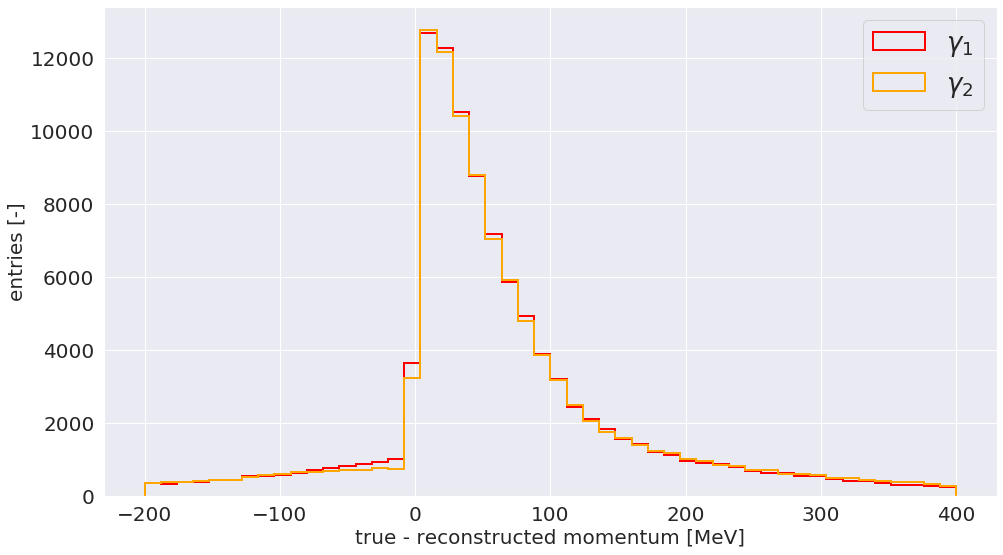

In [8]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(16,9),})

# Binning
x_min  = -200
x_max  = 400
n_bins = 50

# Data
diff_gamma_1_mom = df.true_gamma_1_ekin - np.sqrt( (df.reco_gamma_1_dir_x)**2 +
                                                   (df.reco_gamma_1_dir_y)**2 +
                                                   (df.reco_gamma_1_dir_z)**2) * df.reco_gamma_1_energy

diff_gamma_2_mom = df.true_gamma_2_ekin - np.sqrt( (df.reco_gamma_2_dir_x)**2 +
                                                   (df.reco_gamma_2_dir_y)**2 +
                                                   (df.reco_gamma_2_dir_z)**2) * df.reco_gamma_2_energy

plt.hist(diff_gamma_1_mom, bins=n_bins, range=[x_min,x_max], histtype='step', color='red', linewidth=2)
plt.hist(diff_gamma_2_mom, bins=n_bins, range=[x_min,x_max], histtype='step', color='orange', linewidth=2)
#step or stepfilled, alpha=0.75, density=False alpha=0.75

# Legend
plt.legend(['$\gamma_1$','$\gamma_2$'], loc='best', prop={'size': 26})

# Axes
plt.xlabel('true - reconstructed momentum [MeV]', fontsize=20)
plt.ylabel('entries [-]', fontsize=20)
plt.tick_params(labelsize=20)

# Plot
#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


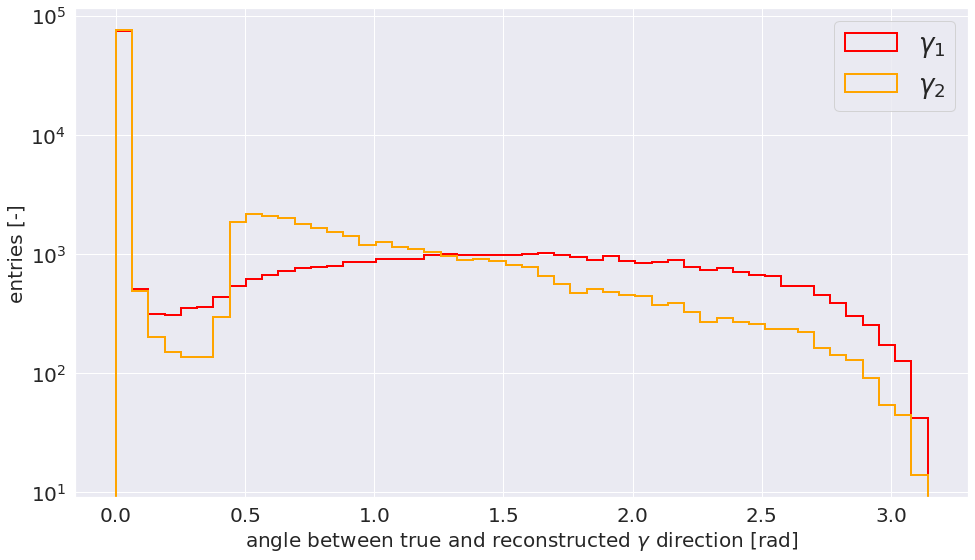

In [9]:
# Dataframe
df = pd.read_csv(data_file_name)


#def calc_angle(a,b):
#    return np.arccos(np.dot(a,b)/(np.linalg.norm(a)+np.linalg.norm(b)))


# Size
seaborn.set(rc={'figure.figsize':(16,9),})

# Binning
x_min  = 0
x_max  = np.pi
n_bins = 50

# Data
true_gamma_1_mom = np.zeros((df.shape[0],3))
reco_gamma_1_mom = np.zeros((df.shape[0],3))
angle_gamma_1 = np.zeros((df.shape[0],1))

true_gamma_2_mom = np.zeros((df.shape[0],3))
reco_gamma_2_mom = np.zeros((df.shape[0],3))
angle_gamma_2 = np.zeros((df.shape[0],1))

# loop over all columns in the dataset to obtain the vectors (true and reco momentum)
for data_row in range(df.shape[0]):
    true_gamma_1_mom[data_row,0] = df.true_gamma_1_mom_x[data_row]
    true_gamma_1_mom[data_row,1] = df.true_gamma_1_mom_y[data_row]
    true_gamma_1_mom[data_row,2] = df.true_gamma_1_mom_z[data_row]
    
    reco_gamma_1_mom[data_row,0] = df.reco_gamma_1_dir_x[data_row]
    reco_gamma_1_mom[data_row,1] = df.reco_gamma_1_dir_y[data_row]
    reco_gamma_1_mom[data_row,2] = df.reco_gamma_1_dir_z[data_row]
    
    true_gamma_2_mom[data_row,0] = df.true_gamma_2_mom_x[data_row]
    true_gamma_2_mom[data_row,1] = df.true_gamma_2_mom_y[data_row]
    true_gamma_2_mom[data_row,2] = df.true_gamma_2_mom_z[data_row]
    
    reco_gamma_2_mom[data_row,0] = df.reco_gamma_2_dir_x[data_row]
    reco_gamma_2_mom[data_row,1] = df.reco_gamma_2_dir_y[data_row]
    reco_gamma_2_mom[data_row,2] = df.reco_gamma_2_dir_z[data_row]

# Calculate the angle [radians] between the vectors
for data_row in range(df.shape[0]):
    try:
        if np.linalg.norm(true_gamma_1_mom[data_row,:])!=0 and np.linalg.norm(reco_gamma_2_mom[data_row,:])!=0:
            angle_gamma_1[data_row] = np.arccos(
                                                 np.dot(true_gamma_1_mom[data_row,:],reco_gamma_1_mom[data_row,:])/
                                                 ((np.linalg.norm(true_gamma_1_mom[data_row,:])*np.linalg.norm(reco_gamma_1_mom[data_row,:])))
                                               )
        if np.linalg.norm(true_gamma_2_mom[data_row,:])!=0 and np.linalg.norm(reco_gamma_2_mom[data_row,:])!=0:
            angle_gamma_2[data_row] = np.arccos(
                                                 np.dot(true_gamma_2_mom[data_row,:],reco_gamma_2_mom[data_row,:])/
                                                 ((np.linalg.norm(true_gamma_2_mom[data_row,:])*np.linalg.norm(reco_gamma_2_mom[data_row,:])))
                                               )
    except RuntimeWarning:
        pass


#np.dot(closest_reco_showers_dir[pi0],closest_reco_showers_dir[pi0+1]
#diff_gamma_1_mom = df.true_gamma_1_ekin - np.sqrt( (df.reco_gamma_1_dir_x)**2 +
#                                                   (df.reco_gamma_1_dir_y)**2 +
#                                                   (df.reco_gamma_1_dir_z)**2) * df.reco_gamma_1_energy
#diff_gamma_2_mom = df.true_gamma_2_ekin - np.sqrt( (df.reco_gamma_2_dir_x)**2 +
#                                                   (df.reco_gamma_2_dir_y)**2 +
#                                                   (df.reco_gamma_2_dir_z)**2) * df.reco_gamma_2_energy

plt.hist(angle_gamma_1, bins=n_bins, range=[x_min,x_max], histtype='step', color='red', linewidth=2)
plt.hist(angle_gamma_2, bins=n_bins, range=[x_min,x_max], histtype='step', color='orange', linewidth=2)
#plt.hist(angle_gamma_1, bins=n_bins, range=[x_min,x_max], histtype='step', color='orange', linewidth=2)
#step or stepfilled, alpha=0.75, density=False alpha=0.75

# Legend
plt.legend(['$\gamma_1$','$\gamma_2$'], loc='best', prop={'size': 26})

# Axes
plt.yscale('log')
plt.xlabel('angle between true and reconstructed $\gamma$ direction [rad]', fontsize=20)
plt.ylabel('entries [-]', fontsize=20)
plt.tick_params(labelsize=20)

# Plot
#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()


### -> gamma_2 @ 0.5 rad ?

# Energies, energy deposition and pixel sums

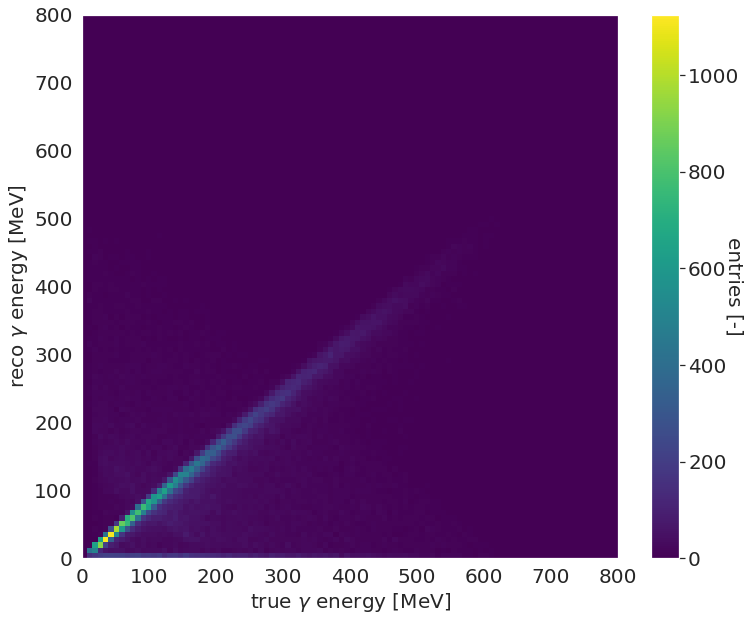

In [10]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 800
y_min    = 0
y_max    = 800
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
plt.hist2d(df.true_gamma_1_ekin, df.reco_gamma_1_energy, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.true_gamma_2_ekin, df.reco_gamma_2_energy, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true $\gamma$ energy [MeV]', fontsize=20)
plt.ylabel('reco $\gamma$ energy [MeV]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

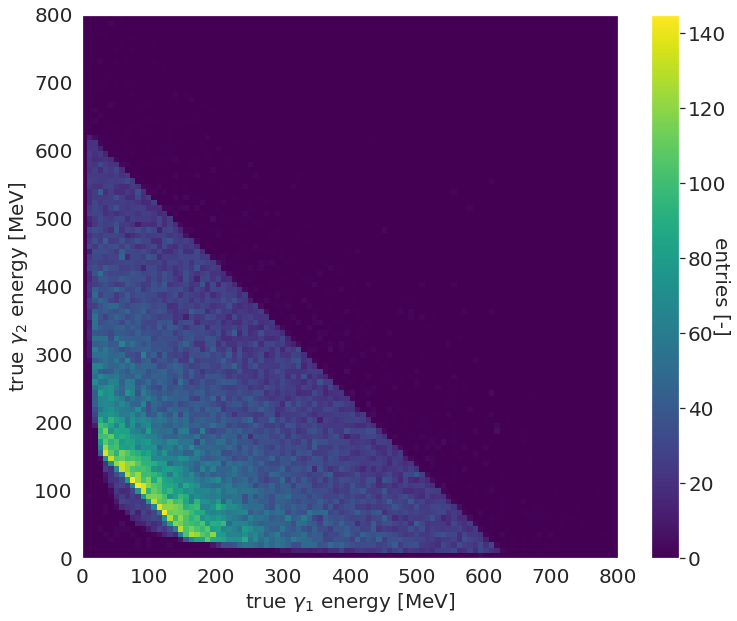

In [11]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 800
y_min    = 0
y_max    = 800
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
plt.hist2d(df.true_gamma_1_ekin, df.true_gamma_2_ekin, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true $\gamma_1$ energy [MeV]', fontsize=20)
plt.ylabel('true $\gamma_2$ energy [MeV]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

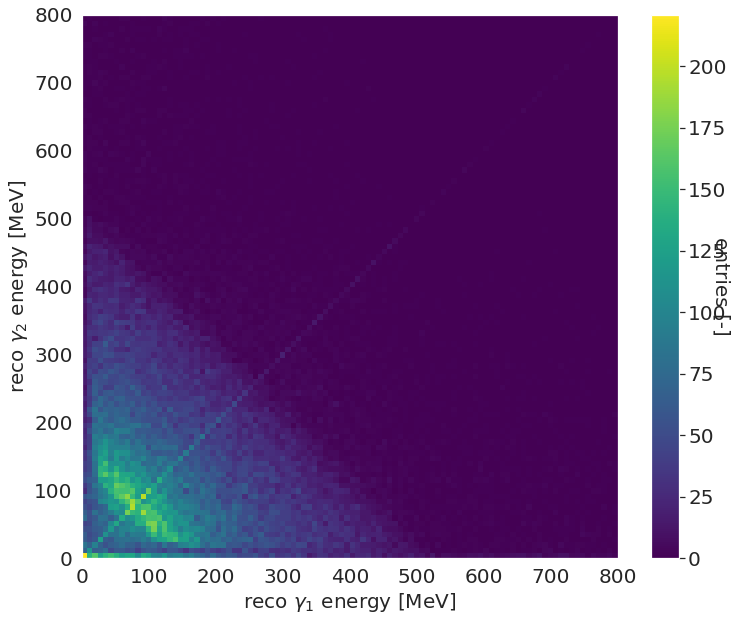

In [12]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 800
y_min    = 0
y_max    = 800
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['reco_gamma_1_energy'] > 0) & (df['reco_gamma_1_energy'] > 0)]
plt.hist2d(df.reco_gamma_1_energy, df.reco_gamma_2_energy, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('reco $\gamma_1$ energy [MeV]', fontsize=20)
plt.ylabel('reco $\gamma_2$ energy [MeV]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

### -> diagonal line?

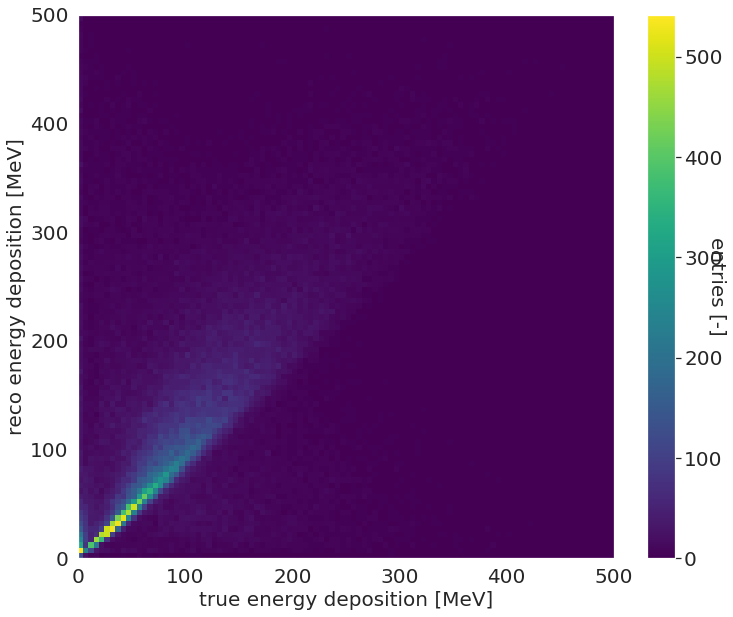

In [13]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 500
y_min    = 0
y_max    = 500
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['true_gamma_1_energy_deposit'] > 0) & (df['true_gamma_2_energy_deposit'] > 0)]
df = df[(df['reco_gamma_1_energy'] > 0) & (df['reco_gamma_2_energy'] > 0)]
plt.hist2d(df.true_gamma_1_energy_deposit, df.reco_gamma_1_energy, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.true_gamma_2_energy_deposit, df.reco_gamma_2_energy, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true energy deposition [MeV]', fontsize=20)
plt.ylabel('reco energy deposition [MeV]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

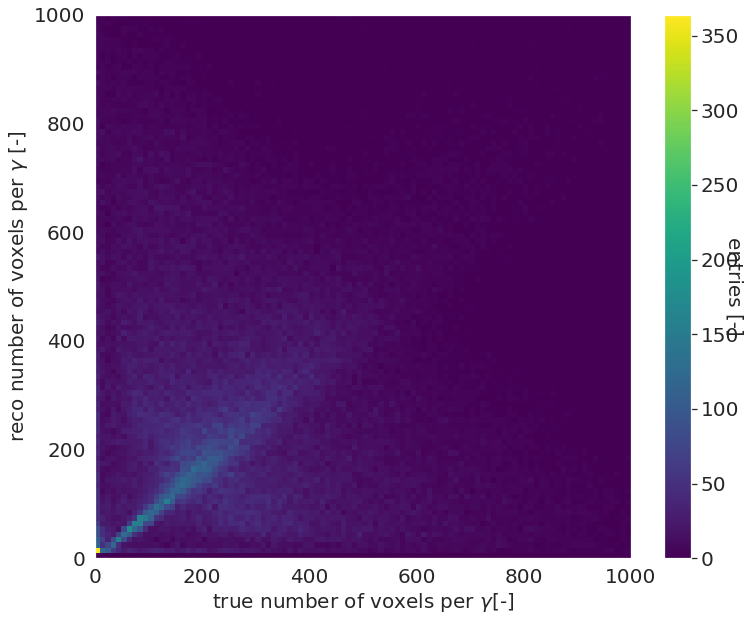

In [14]:
# Dataframe
df = pd.read_csv(data_file_name)

#Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 1000
y_min    = 0
y_max    = 1000
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['true_gamma_1_num_voxels'] > 0) & (df['reco_gamma_1_num_voxels'] > 0)]
df = df[(df['true_gamma_2_num_voxels'] > 0) & (df['reco_gamma_2_num_voxels'] > 0)]
plt.hist2d(df.true_gamma_1_num_voxels, df.reco_gamma_1_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.true_gamma_2_num_voxels, df.reco_gamma_2_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true number of voxels per $\gamma$[-]', fontsize=20)
plt.ylabel('reco number of voxels per $\gamma$ [-]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

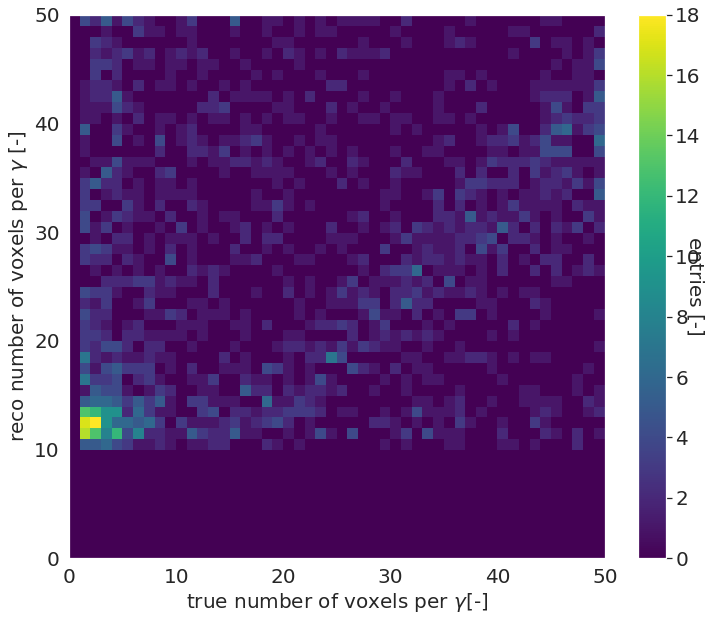

In [15]:
# Dataframe
df = pd.read_csv(data_file_name)

#Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 50
y_min    = 0
y_max    = 50
n_bins_x = 50
n_bins_y = 50
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['true_gamma_1_num_voxels'] > 0) & (df['reco_gamma_1_num_voxels'] > 0)]
df = df[(df['true_gamma_2_num_voxels'] > 0) & (df['reco_gamma_2_num_voxels'] > 0)]
plt.hist2d(df.true_gamma_1_num_voxels, df.reco_gamma_1_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.true_gamma_2_num_voxels, df.reco_gamma_2_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true number of voxels per $\gamma$[-]', fontsize=20)
plt.ylabel('reco number of voxels per $\gamma$ [-]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

# -> threshold reco ~ 10 voxels, island @ almost no true voxels?

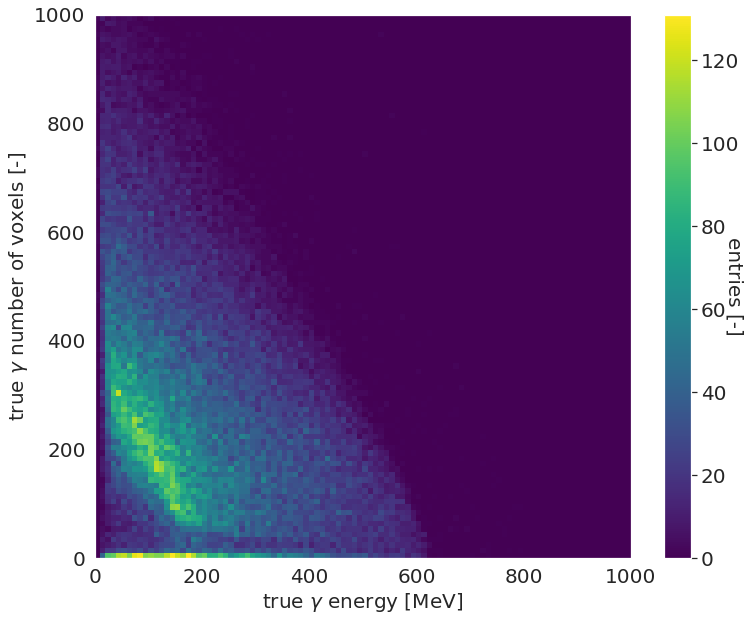

In [16]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 1000
y_min    = 0
y_max    = 1000
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['true_gamma_1_num_voxels'] > 0) & (df['true_gamma_1_ekin'] > 0)]
df = df[(df['true_gamma_2_num_voxels'] > 0) & (df['true_gamma_2_ekin'] > 0)]
plt.hist2d(df.true_gamma_1_ekin, df.true_gamma_1_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.true_gamma_2_ekin, df.true_gamma_2_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true $\gamma$ energy [MeV]', fontsize=20)
plt.ylabel('true $\gamma$ number of voxels [-]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

### -> anticorrelated?!

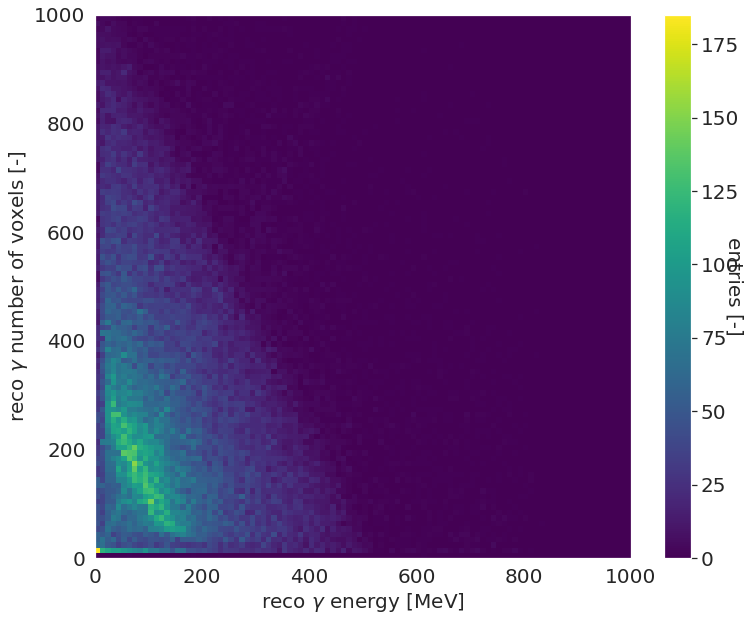

In [17]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 1000
y_min    = 0
y_max    = 1000
n_bins_x = 100
n_bins_y = 100
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['reco_gamma_1_num_voxels'] > 0) & (df['reco_gamma_1_energy'] > 0)]
df = df[(df['reco_gamma_2_num_voxels'] > 0) & (df['reco_gamma_2_energy'] > 0)]
plt.hist2d(df.reco_gamma_1_energy, df.reco_gamma_1_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.reco_gamma_1_energy, df.reco_gamma_2_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('reco $\gamma$ energy [MeV]', fontsize=20)
plt.ylabel('reco $\gamma$ number of voxels [-]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

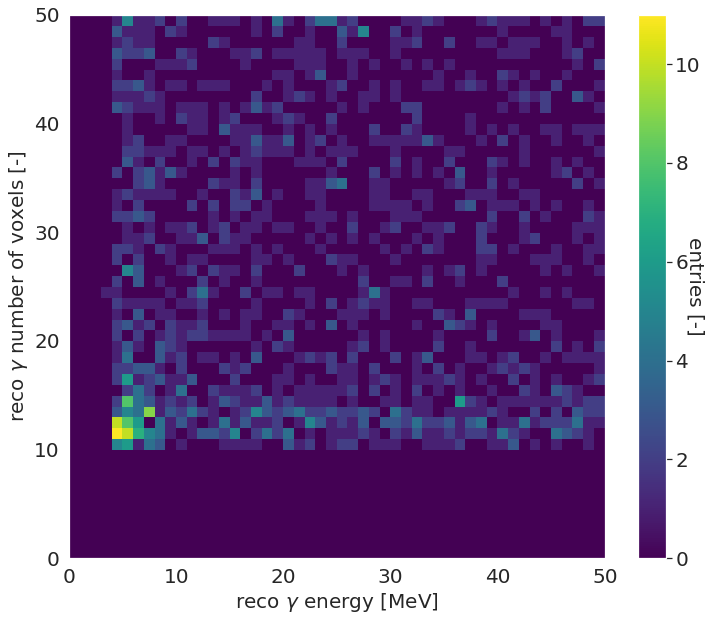

In [18]:
# Dataframe
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

from numpy import c_

# Binning
x_min    = 0
x_max    = 50
y_min    = 0
y_max    = 50
n_bins_x = 50
n_bins_y = 50
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)

# Data
df = df[(df['reco_gamma_1_num_voxels'] > 0) & (df['reco_gamma_1_energy'] > 0)]
df = df[(df['reco_gamma_2_num_voxels'] > 0) & (df['reco_gamma_2_energy'] > 0)]
plt.hist2d(df.reco_gamma_1_energy, df.reco_gamma_1_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
plt.hist2d(df.reco_gamma_1_energy, df.reco_gamma_2_num_voxels, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('reco $\gamma$ energy [MeV]', fontsize=20)
plt.ylabel('reco $\gamma$ number of voxels [-]', fontsize=20)
plt.tick_params(labelsize=20)

#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()

# Opening angle

In [19]:
# Produce plots

# Neutral pion mass

 Fitted parameters: 
 a [-]: 	  67006.54885835736  
 μ [MeV/c2]: 	  105.56325376585215  
 σ [MeV/c2]: 	  9.532780671480708


<Figure size 1152x648 with 0 Axes>

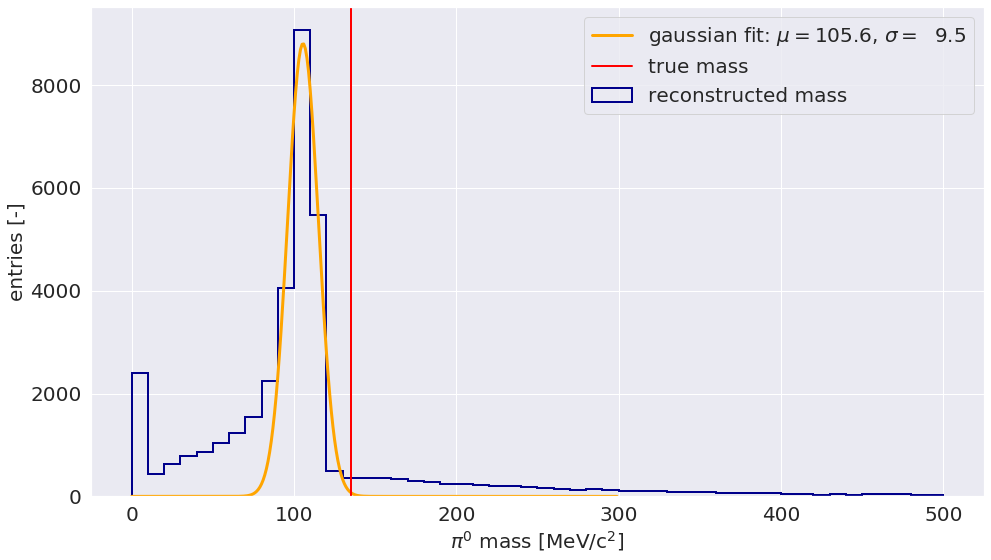

In [20]:
# Dataframe
#df = pd.read_csv(data_file_name)
df = pd.read_csv('true_pi0s_all.csv')

#df = df[(df['reco_pi0_mass'] > 0)]
df = df[(df['event'] < 41000)] # for larger datasets, the fit becomes very narrow...

# Size, etc.
seaborn.set(rc={'figure.figsize':(16,9),})
plt.figure()
fig, ax = plt.subplots()

# Fit functions
def gaus(x, a, mu, sigma):
    return  a*np.exp(-(x-mu)**2/2./sigma**2)/np.sqrt(2./np.pi)/sigma

def fit_func(bins, n, func):
    from scipy.optimize import curve_fit
    center = (bins[:-1] + bins[1:]) / 2
    popt, pcov = curve_fit(func, center, n, p0=(100, 100, 10))
    print(" Fitted parameters: \n a [-]: \t ", popt[0],
          " \n \u03BC [MeV/c2]: \t ", popt[1],
          " \n \u03C3 [MeV/c2]: \t ", popt[2])

    x = np.arange(0, 300, 1)
    y = func(x, popt[0], popt[1], popt[2])
    plt.plot(x, y, label='gaussian fit: $\mu=$%5.1f, $\sigma=$%5.1f' % (popt[1], popt[2]), color='orange', linewidth=3)
    plt.legend()

# Binning
x_min  = 0
x_max  = 500
n_bins = 50

# Data
n, bins, patches = ax.hist(df.reco_pi0_mass, bins=n_bins, range=[x_min,x_max],
                           histtype='step', color='darkblue', linewidth=2,
                           label='reconstructed mass')
fit_func(bins, n, gaus)
ax.axvline(x=true_pi0_mass, color='red', linewidth=2, label='true mass')
#plt.hist(df.reco_pi0_mass, bins=n_bins, range=[x_min,x_max], histtype='step', color='g', linewidth=2)
#step or stepfilled, alpha=0.75, density=False alpha=0.75

# Legend
plt.legend(loc='best', prop={'size': 20})
#plt.legend(['gaussian fit','true mass','reconstructed data'], loc='best', prop={'size': 20})

# Axes
plt.xlabel('$\pi^0$ mass [MeV/c$^2$]', fontsize=20)
plt.ylabel('entries [-]', fontsize=20)
plt.tick_params(labelsize=20)

# Plot
#plt.savefig("NAME.png", bbox_inches='tight')
plt.show()
plt.close()